
1. ezek az oszlopok maradtak:
link
price
category
rooms
location
added_on
description_start
close_to
vendor_image
vendor
phone
close_to_distance
close_to2
close_to_distance2

2. sorok száma a csv-ben:
301

3. a véletlen számom:
11555

4. az első sor allapot oszlopában:
közepes állapotú

leválogatás:

0    1
1    0
Name: DRAGABB_TRUE, dtype: int64


        ID      ALLAPOT  EGESZ_SZOBAK  EMELET  FELSZOBAK  \
1638   234   felújított             2       1          0   
1639  1504  jó állapotú             1       0          1   

                            FUTES  KERT_TERULET  KERULET KILATAS  \
1638                  gáz (cirko)           NaN        8   utcai   
1639  házközponti egyedi méréssel           NaN       13     NaN   

            KOMFORT LIFT PARKOLAS   SAVE_DATE  SZINTEK  TERULET  TETOTER  \
1638  összkomfortos  van    nincs  2013.04.18        5       56       -1   
1639  összkomfortos  van   garazs  2013.05.04      NaN       41       -1   

                                 

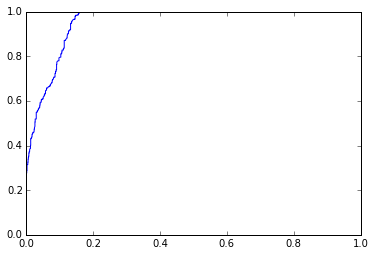


7. keresztvalidáció: az 5 pontosságérték:
[ 0.7993921   0.79635258  0.80487805  0.81651376  0.78287462]

8. python verzió:
2.7.3 (default, Dec 18 2014, 19:10:20) 
[GCC 4.6.3]

9. len(my_func_gen(12345))
értelmetlen, mivel a generátornak nem tudjuk a hosszát előre.

100 loops, best of 3: 570 ns per loop
100 loops, best of 3: 780 ns per loop
100 loops, best of 3: 589 ns per loop
300 loops, best of 3: 740 ns per loop
Round 0 completed
100 loops, best of 3: 797 µs per loop
100 loops, best of 3: 782 µs per loop
100 loops, best of 3: 579 ns per loop
300 loops, best of 3: 818 µs per loop
Round 250 completed
100 loops, best of 3: 1.66 ms per loop
100 loops, best of 3: 1.61 ms per loop
100 loops, best of 3: 591 ns per loop
300 loops, best of 3: 1.68 ms per loop
Round 500 completed
100 loops, best of 3: 2.51 ms per loop
100 loops, best of 3: 2.45 ms per loop
100 loops, best of 3: 579 ns per loop
300 loops, best of 3: 2.11 ms per loop
Round 750 completed
100 loops, best of 3: 3.36 ms per loop
10

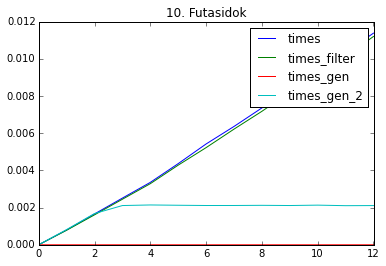


11.magyarázat:
Az első kettő mindig ugyan azt csinálja, időigényesen push/pop a paramétereket/return értéket a stackből.
A gen csak a generátort hívja meg, azon nem iterál végig, így nagyon gyors(de nem is csinál semmit).
A gen_2 a generátor segítségével dolgozik, gyorsabban.


In [2]:
%matplotlib inline
import json
import sys
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import sklearn.ensemble as ens
from sklearn.metrics import roc_curve as roc
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score as auc_score
from sklearn.metrics import accuracy_score as acc
import sklearn.cross_validation as xval
#json betöltése
adat = json.load(open('zoopla_ingatlan.json'))
#oszlopok, amik nem  _vel kezdődnek
oszlopok = []
for column in adat["columns"]:
    if not(column["id"].startswith("_")):
        oszlopok.append(column["id"])
#1. feladat
print("\n1. ezek az oszlopok maradtak:")
for o in oszlopok: print(str(o))
#adatok betöltése
df = pd.DataFrame(adat['data'], columns=oszlopok)
#csv kiírás
df.to_csv('feladat1.csv')
file = open('feladat1.csv')
numline = len(file.readlines())
#2. feladat eredménye
print('\n2. sorok száma a csv-ben:')
print (numline)

#véletlenszám
myrandom = int(random.random()*20000+1000)
random.seed(myrandom) #beállítom, hogy később is ezt használja
print('\n3. a véletlen számom:')
print(myrandom)

#csv beolvasás
df = pd.read_csv('ingatlan_train.csv', encoding = 'iso-8859-2')

#beolvasás
print('\n4. az első sor allapot oszlopában:')
print(df['ALLAPOT'][0])

#leválogatás
print('\nleválogatás:\n')

#print
print(df['DRAGABB_TRUE'][:2])
print('\n')
print(df.drop(['DRAGABB_TRUE'], axis = 1)[-2:])
print('\n')

#kategorikus&missing
df2 = pd.get_dummies(df)
df2 = df2.fillna(0)

#modellezés
clf = ens.GradientBoostingClassifier()
clf = clf.fit(df2.drop('DRAGABB_TRUE', axis=1), df2['DRAGABB_TRUE'])
pred = clf.predict(df2.drop('DRAGABB_TRUE', axis=1))
prob = clf.predict_proba(df2.drop('DRAGABB_TRUE', axis=1))[:,1]

#auc érték számítása
print('\n5. AUC érték:')
print(auc_score(df2['DRAGABB_TRUE'], prob))

#roc görbe
print('\n6. ROC görbe:')
fpr, tpr, thresholds = roc(df2['DRAGABB_TRUE'], prob)
plt.plot(fpr, tpr)
plt.show()

#keresztvalidáció
print('\n7. keresztvalidáció: az 5 pontosságérték:')
sc = xval.cross_val_score(ens.GradientBoostingClassifier(), df2.drop('DRAGABB_TRUE', axis=1), df2['DRAGABB_TRUE'], cv = 5)
print(sc)

#4.feladat
print('\n8. python verzió:')
print (sys.version)

test = lambda i: ((sum(map(int, str(i))) % 5) in [0, 2])
def my_func(limit=0, last=0):
   return [i for i in xrange(1, limit+1) if test(i)]
def my_func_filter(limit=0, last=0):
   return filter(test, xrange(1, limit+1))
def my_func_gen(limit=0, last=0):
    mylist = xrange(limit)
    for i in mylist:
            if(test(i)):
                yield i
#len
print('\n9. len(my_func_gen(12345))' + '\nértelmetlen, mivel a generátornak nem tudjuk a hosszát előre.\n')

def get_some(iterable):
    pick = 250
    for _ in iterable:
        pick -= 1
        if pick == 0:
            break
iters = xrange(0, 3001, 250)
times = []
times_filter = []
times_gen = []
times_gen_2 = []
for i in iters:
    runtime = %timeit -n 100 -r 3 -o my_func(i)
    times.append(runtime.best)
    runtime = %timeit -n 100 -r 3 -o my_func_filter(i)
    times_filter.append(runtime.best)
    runtime = %timeit -n 100 -r 3 -o my_func_gen(i)
    times_gen.append(runtime.best)
    runtime = %timeit -n 300 -r 3 -o get_some(my_func_gen(i))
    times_gen_2.append(runtime.best)
    print('Round {} completed'.format(i))
#plot
plt.plot(times)
plt.plot(times_filter)
plt.plot(times_gen)
plt.plot(times_gen_2)
plt.legend(['times','times_filter','times_gen','times_gen_2'])
plt.title('10. Futasidok')
plt.show()
print('\n11.magyarázat:\nAz első kettő mindig ugyan azt csinálja, időigényesen push/pop a paramétereket/return értéket a stackből.\nA gen csak a generátort hívja meg, azon nem iterál végig, így nagyon gyors(de nem is csinál semmit).\nA gen_2 a generátor segítségével dolgozik, gyorsabban.')


In [3]:
df['DRAGABB_TRUE'][:2]

0    1
1    0
Name: DRAGABB_TRUE, dtype: int64